<a href="https://colab.research.google.com/github/Aurora-77777/CASA0005/blob/main/Week_5/Practical_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="float:left">
    <h1 style="width:600px">CASA0006 Practical 5: Neural networks using tensorflow</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Introduction
In this practical, we will introduce [Tensorflow](https://www.tensorflow.org/guide/keras/overview) and use it to:

1. Build a simple two-layer neural network for digit recognition;
1. Train and evaluate this neural network;

## Setting up Google Colab

As installing and configuring tensorflow on laptop can be a pain, we recommend using Google Colab for this practical. Click [here](https://colab.research.google.com/github/huanfachen/DSSS/blob/main/Week_5/Practical_05.ipynb) to run this practical on Google Colab, which requires a Google account.

Resource limit of Google Colab under free plan:

- Memory: up to 12 GB.
- Maximum duration of running a notebook: notebooks can run for at most **12 hours**, depending on availability and your usage patterns. (The notebook will die after at most 12 hours)
- GPU duration: dynamic, up to a few hours. If you use GPU regularly, runtime durations will become shorter and shorter and disconnections more frequent.

*Very Important* - we will use the GPU on Google Colab to accelerate the model training. To do this, go to 'Runtime' -> 'Change runtime type' -> Select 'T4 GPU' -> Save. See below.

![](https://github.com/huanfachen/DSSS/blob/main/Figures/Colab_GPU_setting.jpg?raw=true)

If you are following along in your own development environment, rather than Colab, see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: if you are using your own development environment, please make sure you have upgraded to the latest `pip` before installing TensorFlow 2 package.

## Overview of TensorFlow

[TensorFlow](https://www.tensorflow.org/) is an open source library developed by Google for numerical computation. It is particularly well suited for large-scale machine learning.    

TensorFlow is based on the construction of *computational graphs*. It has evolved considerably since it's open source release in 2015.  We will use TF2, which offers many additional features built on top of core features (the most important is `tf.keras` discussed in later lectures).

### Features of TF

- Similar to [`numpy`](https://numpy.org/doc/stable/) but with GPU support.
- Supports distributed computing.
- Includes a kind of just-in-time (JIT) compiler to optimise speed and memory usage.
- Computational graphs can be saved and exported.
- Supports autodiff and provides numerous advanced optimisers.

### TensorFlow's Python API

<br>

<img src="https://raw.githubusercontent.com/huanfachen/DSSS/main/Figures/tensorflow-Python-API.png" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

### TensorFlow's Architecture

<br>

<img src="https://raw.githubusercontent.com/huanfachen/DSSS/main/Figures/tensorflow-Architecture.png" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

At lowest level TensorFlow is implemented in C++ so that it is highly efficient.

We will focus on the python TensorFlow and Keras interfaces in this practical.

In real-world projects, if you use tensorflow, you will simply interact with the Keras interface but sometimes you might want to use the low-level python API for greater flexibility.

### Hardware

One of the factors responsible for the dramatic recent growth of machine learning is advances in computing power.  

In particular, hardware that supports high levels of parallelism.

<br>

<img src="https://raw.githubusercontent.com/huanfachen/DSSS/main/Figures/cpu_gpu_tpu.png" width="750px" style="display:block; margin:auto"/>

- Central Processing Unit (CPU):
  - General purpose
  - Low latency
  - Low throughput
  - Sequential
  
- Graphics Processing Unit (GPU)
  - Specialised (for graphics initially)
  - High latency
  - High throughput
  - Parallel execution
  
- Tensor Processing Unit (TPU)
  - Specialised for matrix operations
  - High latency
  - Very high throughput
  - Extreme parallel execution

In TensorFlow many operations are implemented in low-level kernels, optimised for specific hardware, e.g. CPUs, GPUS, or TPUs.

TensorFlow's execution engine will ensure operations are run efficiently (across multiple machines and devices if set up accordingly).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture11_Images/tensorflow-Architecture.png" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

#### Aside: chips optimised for ML and AI are an active area of development

Key events of GPU:
- 1999: NVIDIA released GeForce 256 (the first GPU), originally for gaming tasks;
- 2007: NVIDIA released CUDA (**Computing Unified Device Architecture**), a software layer that allows software to use the powerful processing capabilities of GPUs to perform tasks much faster, including AI and gaming;
- 2022: OpenAI launched ChatGPT, which was trained on thousands of Nvidia A100 and H100 GPUs.

Google developed TPU in 2016.

[Graphcore](https://www.graphcore.ai/) developed the Intelligence Processing Unit (IPU) in 2016.

[Groq](https://www.groq.com/) developed the Language Processing Unit (LPU).

******************

## Set up TensorFlow

Import TensorFlow into your programme to get started:

In [67]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Key data type: tensors

TensorFlow API centers around "Tensors" (essentially multi-dimensional arrays of matrices), which are similar to numpy [`ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

### Tensors

Can construct constant tensors with `tf.constant`.

In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 2x3 matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Tensors have a shape and data type (dtype).

In [4]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

### Indexing

Tensor indexing is very similar to numpy.

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1,  tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Operations

Variety of tensor operations are possible.

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
# square
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
# matrix multiplication
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## Tensors and numpy ndarray

Tensors and ndarray are highly compatible. Can create a tensor from ndarray.

In [11]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

Can convert tensor to ndarray.

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

Can apply numpy operations to tensors and vice versa.

In [13]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Gradients

Notes: the section of 'gradients' is optional. If you don't understand it, it is fine.

When training neural networks using gradient descent based approaches, we often need to compute the gradients, in particular, we need to compute the gradient of the cost function with respect to the model weights.  

TensorFlow supports automatical differentiation, which allows gradients to be computed automatically. We will compute gradients analytically, numerically and using TensorFlow's Autodiff functionality at the following point.

Consider this function $ f(w_1, w_2) $ is defined as:

$$
f(w_1, w_2) = 3w_1^2 + 2w_1w_2
$$



In [16]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [17]:
# example of w1 and w2
w1, w2 = 5.0, 3.0

### Computing gradients analytically

In [18]:
def df_dw1(w1, w2):
    return 6 * w1 + 2 * w2
def df_dw2(w1, w2):
    return 2 * w1

In [19]:
df_dw1(w1, w2)

36.0

In [20]:
df_dw2(w1, w2)

10.0

If we compute the gradient analytically, we would need an extra function evaluation for every gradient.  Computationally infeasible for many cases, e.g. large neural networks with hundreds of thousands or millions of parameters.

### Computing gradients numerically

Compute the gradient by finite differences.

In [21]:
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [22]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Note - the gradients computed numerically are approximate.

### Computing gradients with Autodiff

Autodiff builds derivatives of each stage of the computational graph so that gradients can be computed automatically and efficiently.

In [23]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [24]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

Computing gradients with Autodiff only requires one computation, regardless of how many derivatives need to be computed. The results do not suffer from any numerical approximations, although it is limited by machine precision arithmetic.

## Building a simple neural network using TF

We will build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TF. This example uses a low-level approach to better understand all mechanics behind building neural networks and the training process.

### Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

### MNIST Dataset Overview

We will train the neural network to identify MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 255.

In this example, each image will be converted to float32, normalized to [0, 1] and flattened to a 1-D array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [25]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_feature_one_dimension = 28 # img shape: 28*28

# Training parameters.
# learning_rate = 0.1
# training_steps = 2000
# batch_size = 256
# display_step = 100

# Network parameters.  **change by self**
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [26]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalisation - convert the sample data (range of 1-125) to floating numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


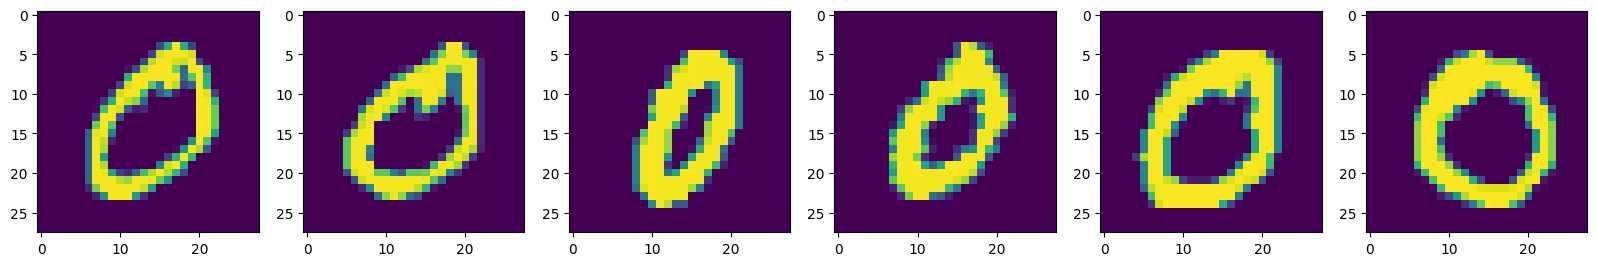

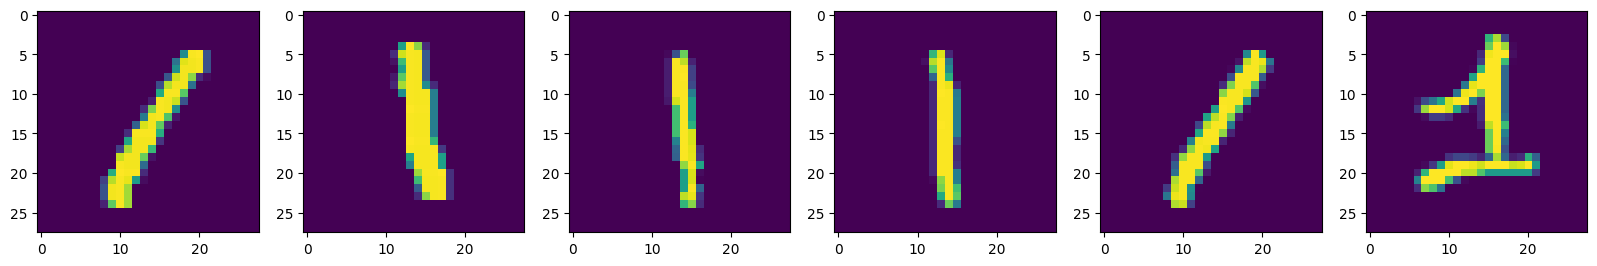

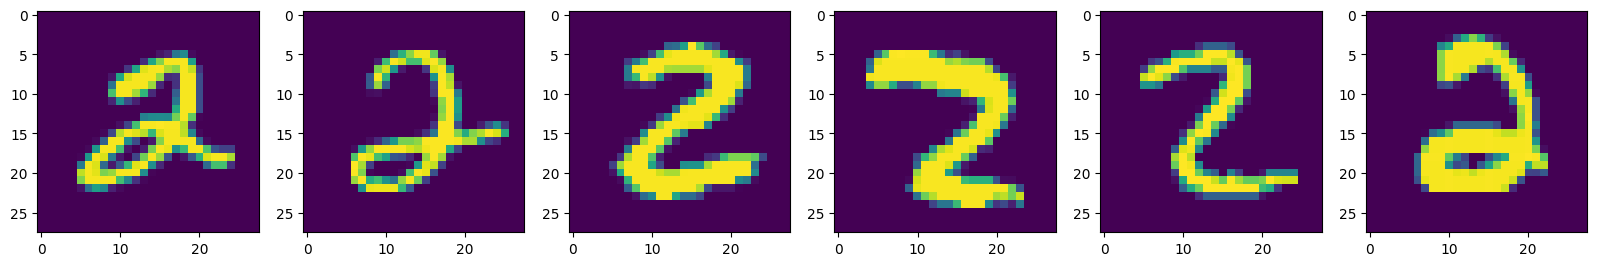

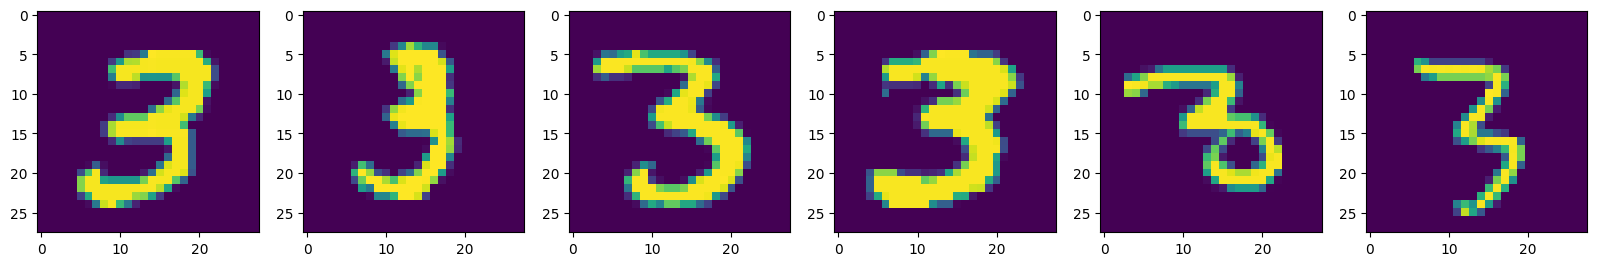

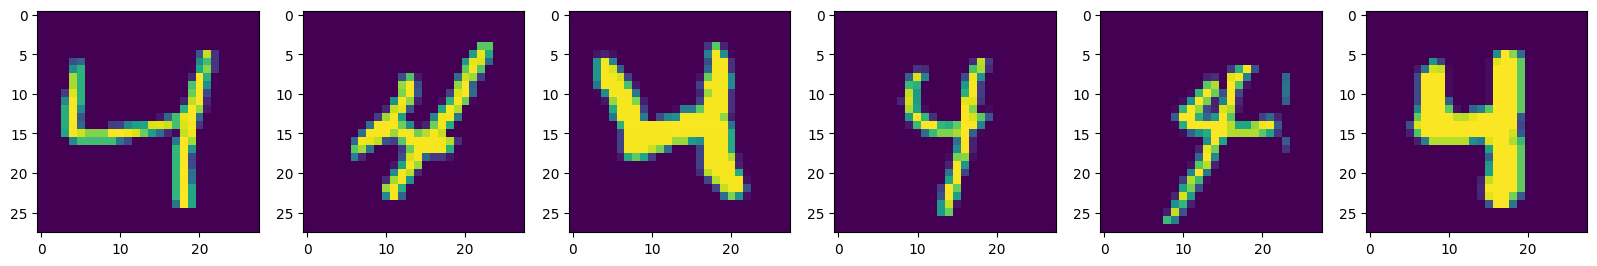

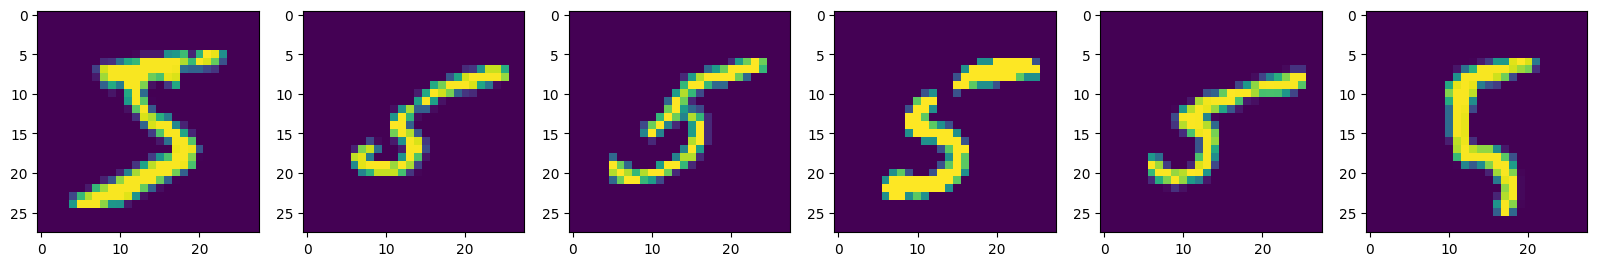

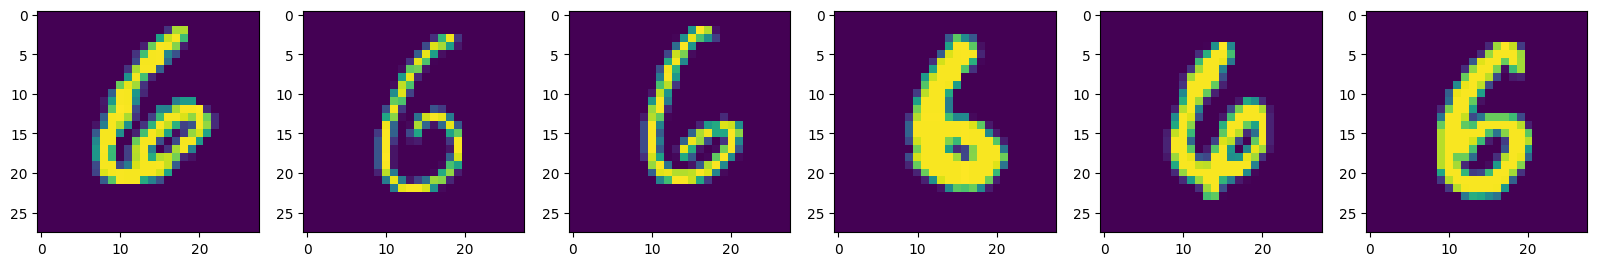

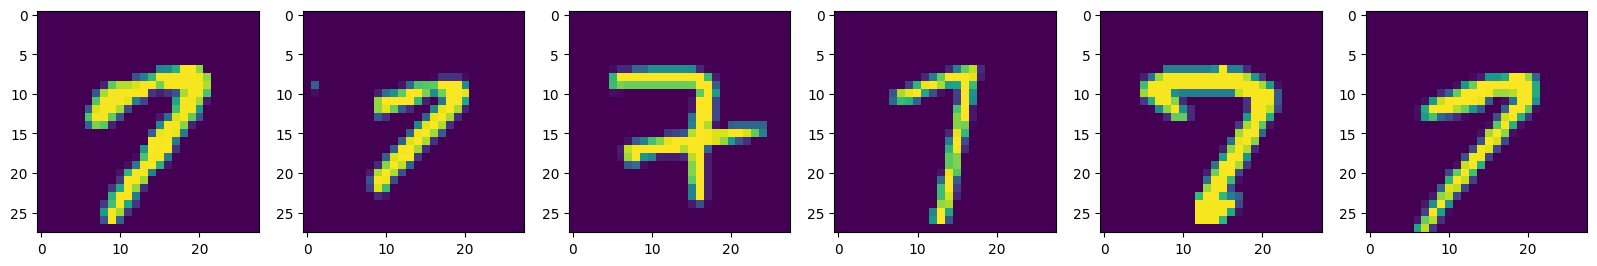

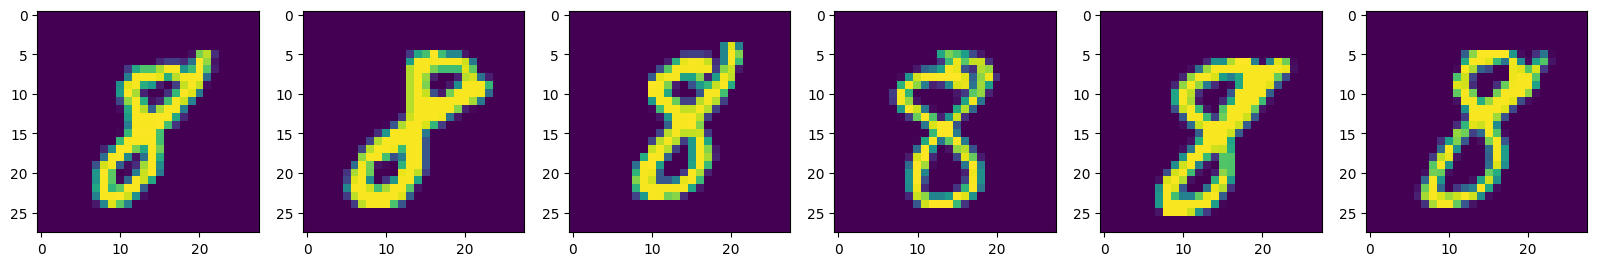

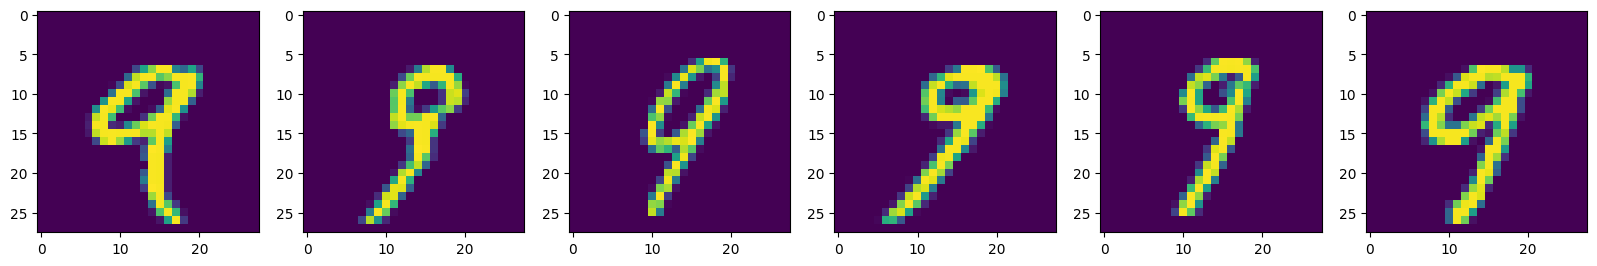

In [28]:
# function for visualising digits
def plot_num(number):

  item_index = np.where(y_train[:1000]==number)
  subset=x_train[item_index]

  egs=6
  fig, axs = plt.subplots(1,egs, figsize=(20,10))

  for i in range(0,egs):
    axs[i].imshow(subset[i])

for x in range(0,10):
  plot_num(x)

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [61]:
model = tf.keras.models.Sequential([
  # input layer (28*28), which is flattened before being fed into the neural network
  tf.keras.layers.Flatten(input_shape=(num_feature_one_dimension, num_feature_one_dimension)),
  # First fully-connected hidden layer.
  tf.keras.layers.Dense(n_hidden_1, activation='relu'),
  # Second fully-connected hidden layer.
  tf.keras.layers.Dense(n_hidden_2, activation='relu'),
  # output layer
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [62]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.4747815 , 0.4506085 , 0.5173937 , 0.5038148 , 0.45797405,
        0.5235313 , 0.543808  , 0.49931353, 0.50286335, 0.53996027]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [63]:
tf.nn.softmax(predictions).numpy()

array([[0.09732806, 0.09500357, 0.10156506, 0.10019524, 0.0957059 ,
        0.10219034, 0.10428357, 0.09974524, 0.10009995, 0.10388309]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [64]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [65]:
loss_fn(y_train[:1], predictions).numpy()

2.2809181

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [66]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimise the loss:

In [47]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8855 - loss: 0.3899
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9689 - loss: 0.0992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9835 - loss: 0.0490
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0376
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9891 - loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0229
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9913 - loss: 0.0254
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0171
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0142


The `Model.evaluate` method checks the models performance, usually on a [Validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [Test set](https://developers.google.com/machine-learning/glossary#test-set).

In [48]:
model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - 5ms/step - accuracy: 0.9768 - loss: 0.0938


[0.09384626150131226, 0.9768000245094299]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [49]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

To check a random data point and prediction:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9


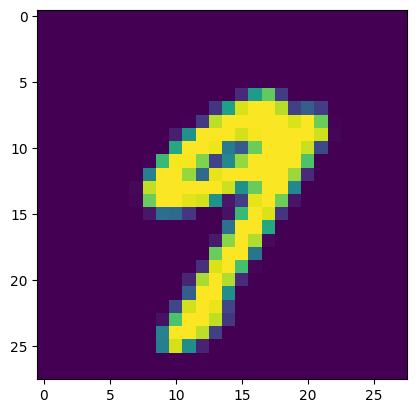

In [50]:
#probability_model(x_test[:1])
predictions=probability_model.predict(x_test)

index=20

print(np.argmax(predictions[index]))
plt.imshow(x_test[index])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


## References and recommendations:

1. Some materials are from Machine Learning with Big Data (SPCE0038) module at UCL.